## Решающие деревья

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Решение должно содержать:
* Ноутбук homework-practice-05-Username.ipynb
* Модуль hw5code.py

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:
9

In [1]:
import numpy as np
from collections import Counter
from sklearn.base import BaseEstimator, ClassifierMixin

class DecisionTree(BaseEstimator):#, ClassifierMixin):
    def __init__(self, feature_types):#, max_depth=None, min_samples_split=None, min_samples_leaf=None):
        self.feature_types = feature_types
#         if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
#             raise ValueError("There is unknown feature type")
    
    def fit(self, X, y):
        self._fit_node(X, y, self._tree)

    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)

clf = DecisionTree(feature_types=['real'] * 5)
clf

DecisionTree(feature_types=['real', 'real', 'real', 'real', 'real'])

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [3]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [4]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

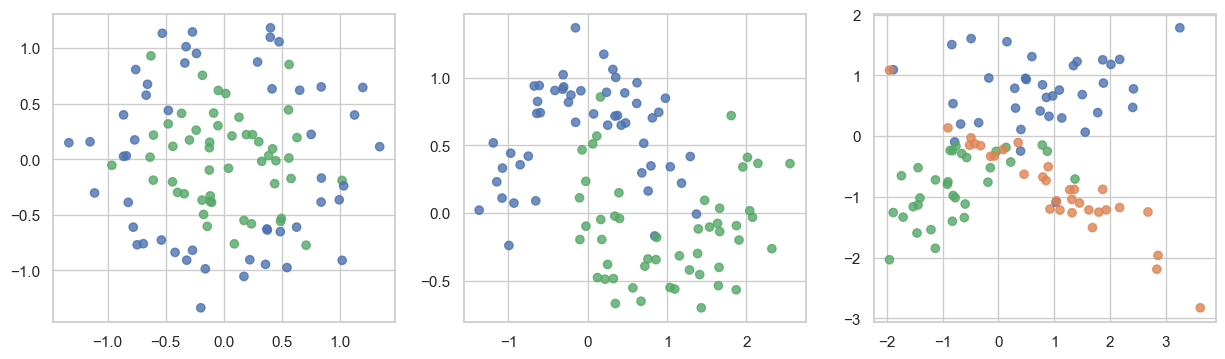

In [5]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [6]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

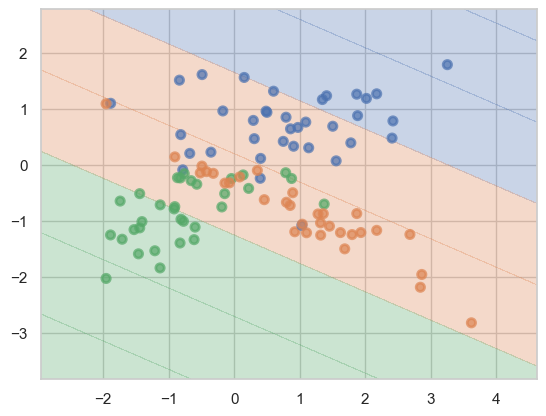

In [7]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Dataset 1
Accuracy на обучающей выборке: 1.00
Accuracy на тестовой выборке: 0.73
Переобучение: Да



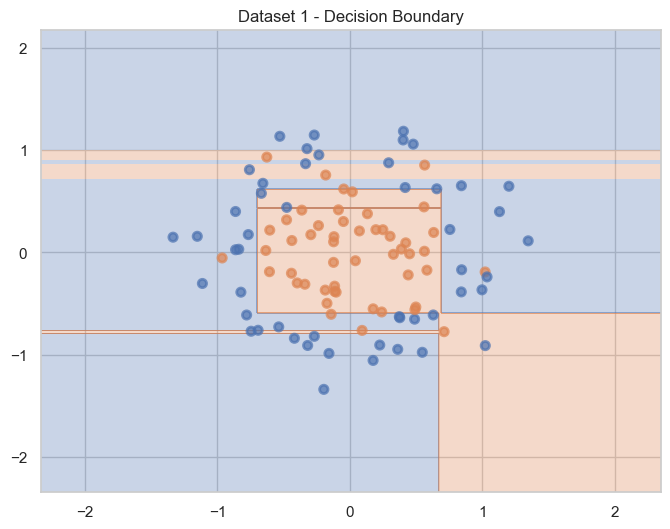

Dataset 2
Accuracy на обучающей выборке: 1.00
Accuracy на тестовой выборке: 0.87
Переобучение: Да



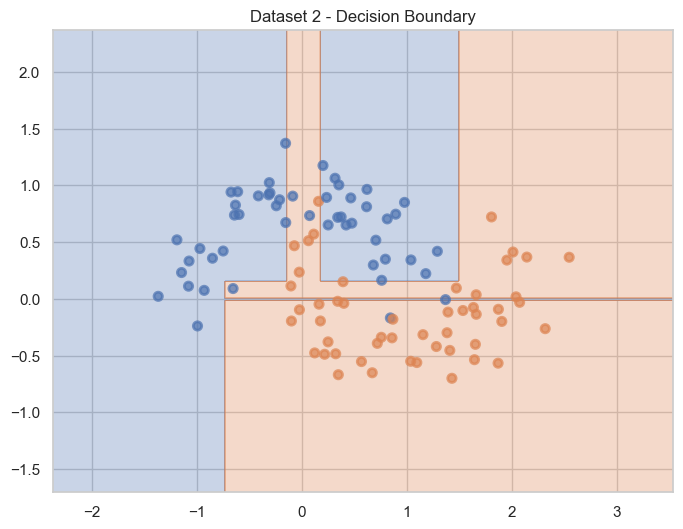

Dataset 3
Accuracy на обучающей выборке: 1.00
Accuracy на тестовой выборке: 0.83
Переобучение: Да



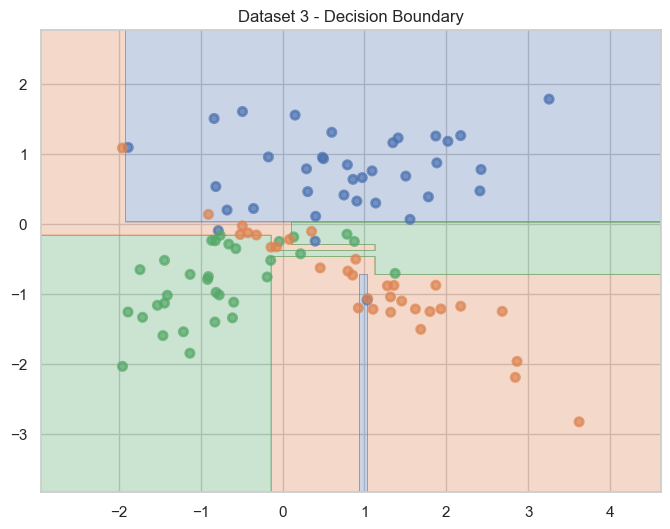

In [8]:
from sklearn.metrics import accuracy_score

for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)
    
    train_accuracy = accuracy_score(y_train, clf.predict(X_train))
    test_accuracy = accuracy_score(y_test, clf.predict(X_test))
    
    print(f"Dataset {i+1}")
    print(f"Accuracy на обучающей выборке: {train_accuracy:.2f}")
    print(f"Accuracy на тестовой выборке: {test_accuracy:.2f}")
    print(f"Переобучение: {'Да' if train_accuracy > test_accuracy else 'Нет'}\n")
    
    plt.figure(figsize=(8, 6))
    plot_surface(clf, X, y)
    plt.title(f"Dataset {i+1} - Decision Boundary")
    plt.show()

__Ответ:__
На всех трёх датасетах дерево решений похоже переобучилось. Это видно потому что на обучающей выборке точность 1.00, а на тесте ниже, особенно на первом датасете, где получилось всего 0.73. На втором и третьем датасетах тестовая точность тоже ниже — 0.87 и 0.83, соответственно. В общем, похоже, модель слишком подстроилась под обучающие данные, а на тесте уже не так хорошо работает.

__2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

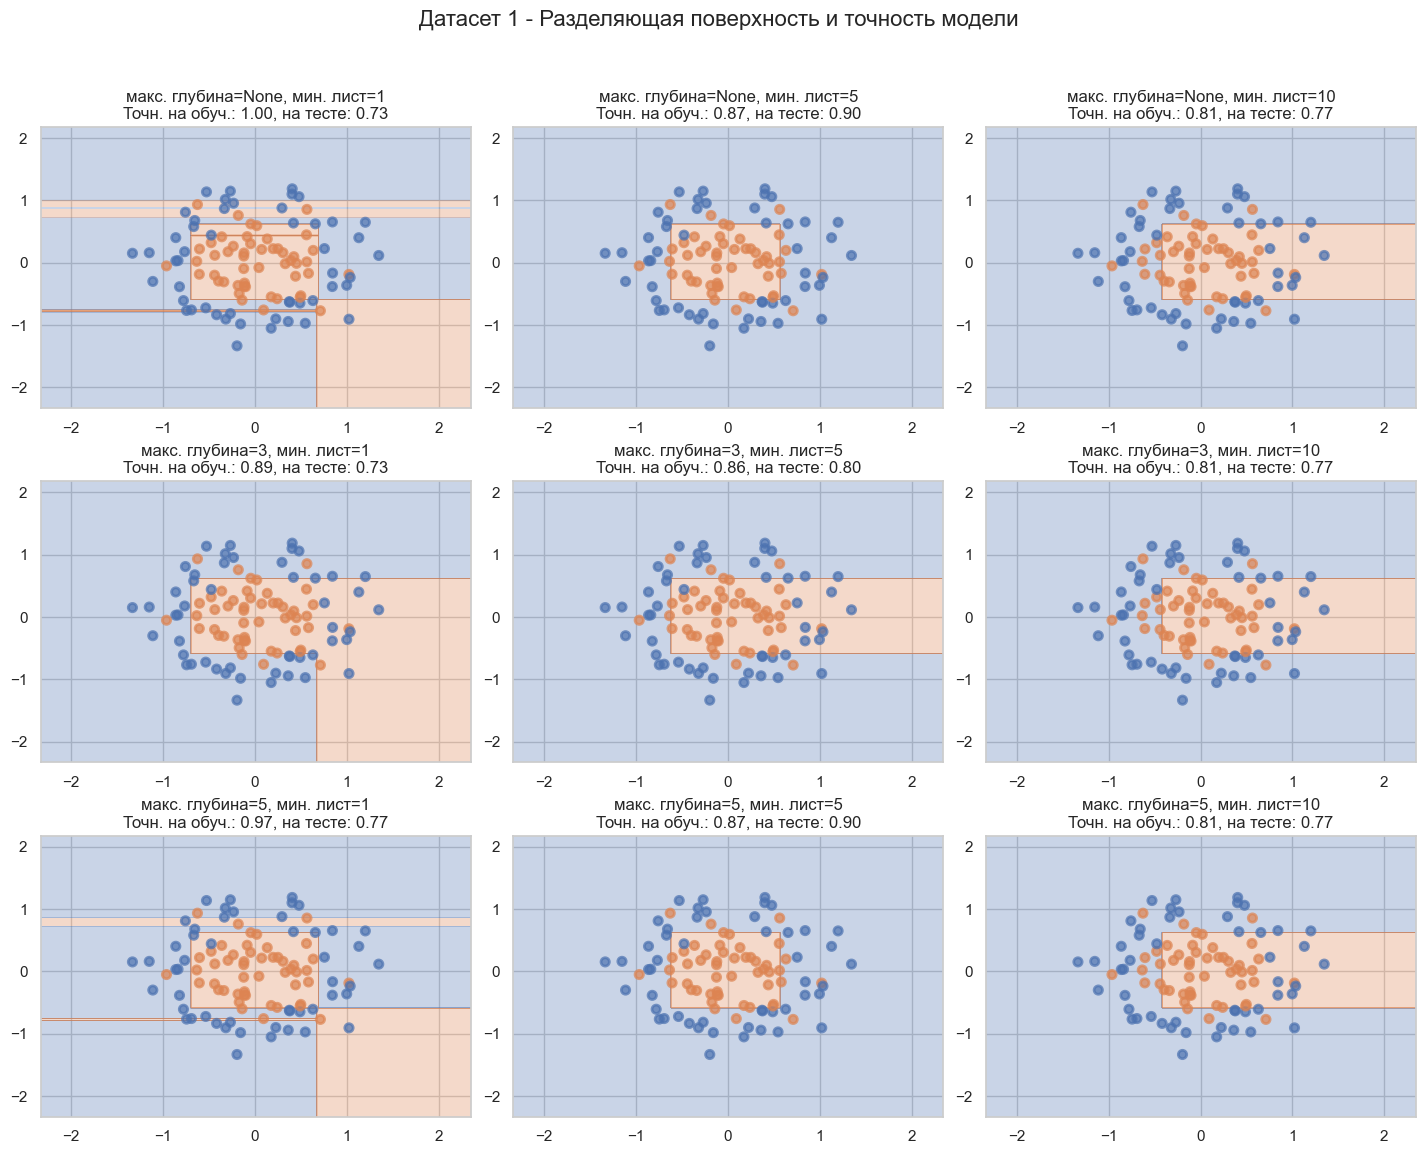

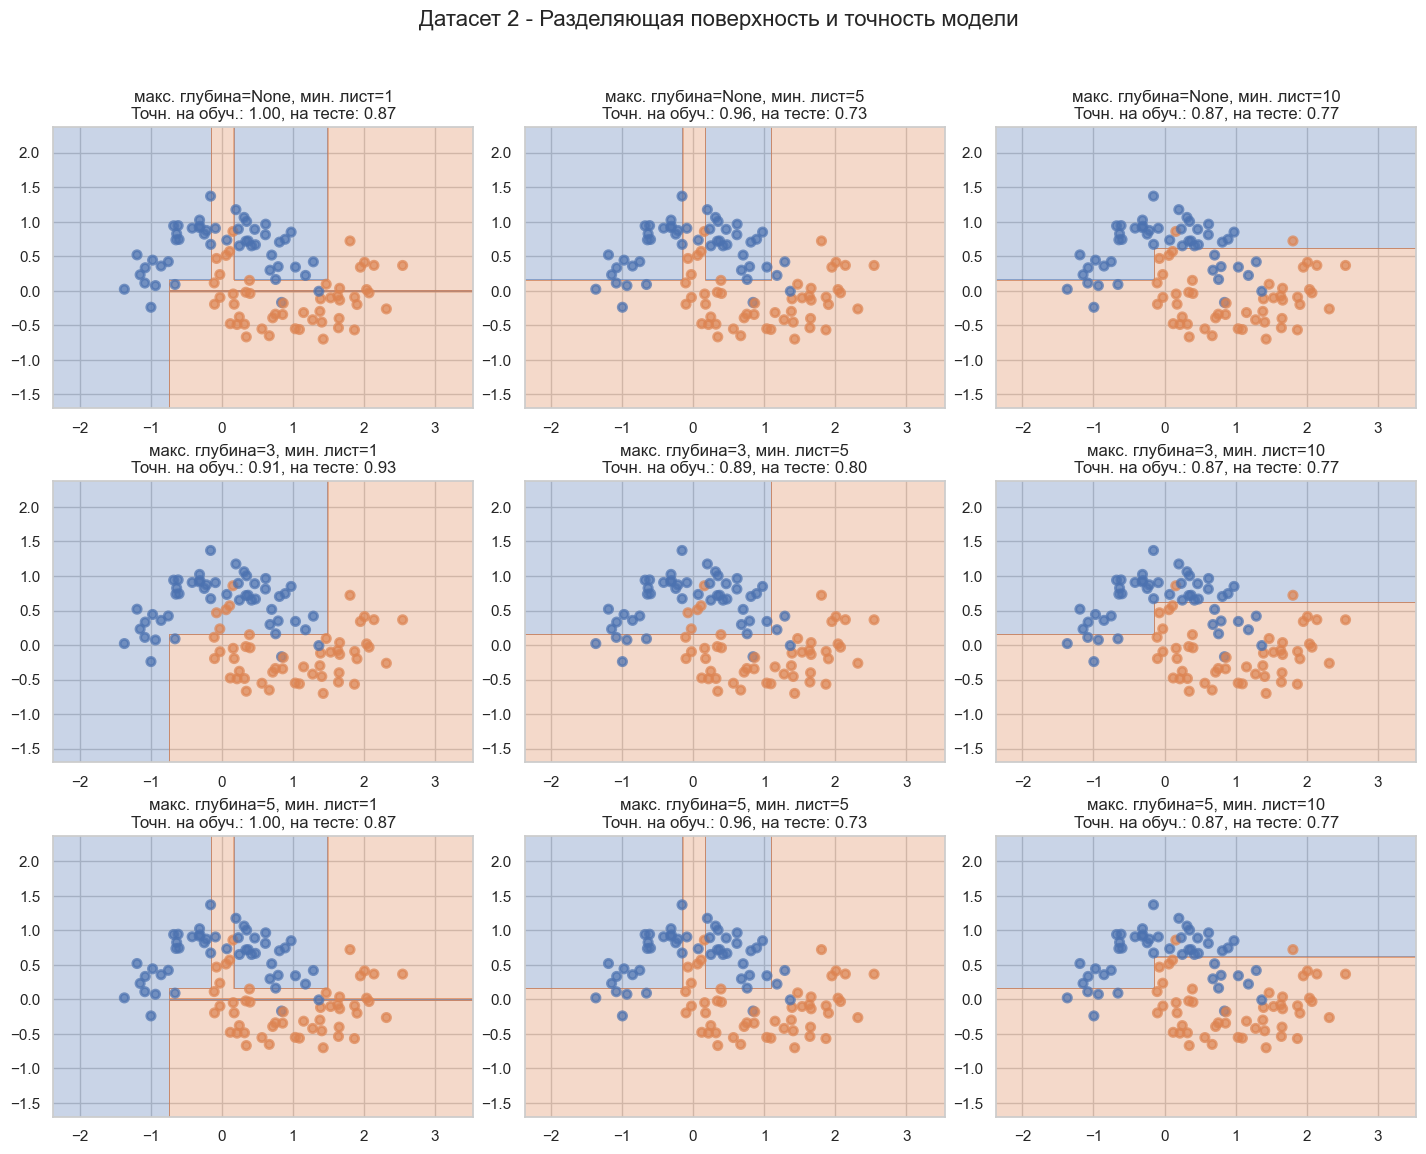

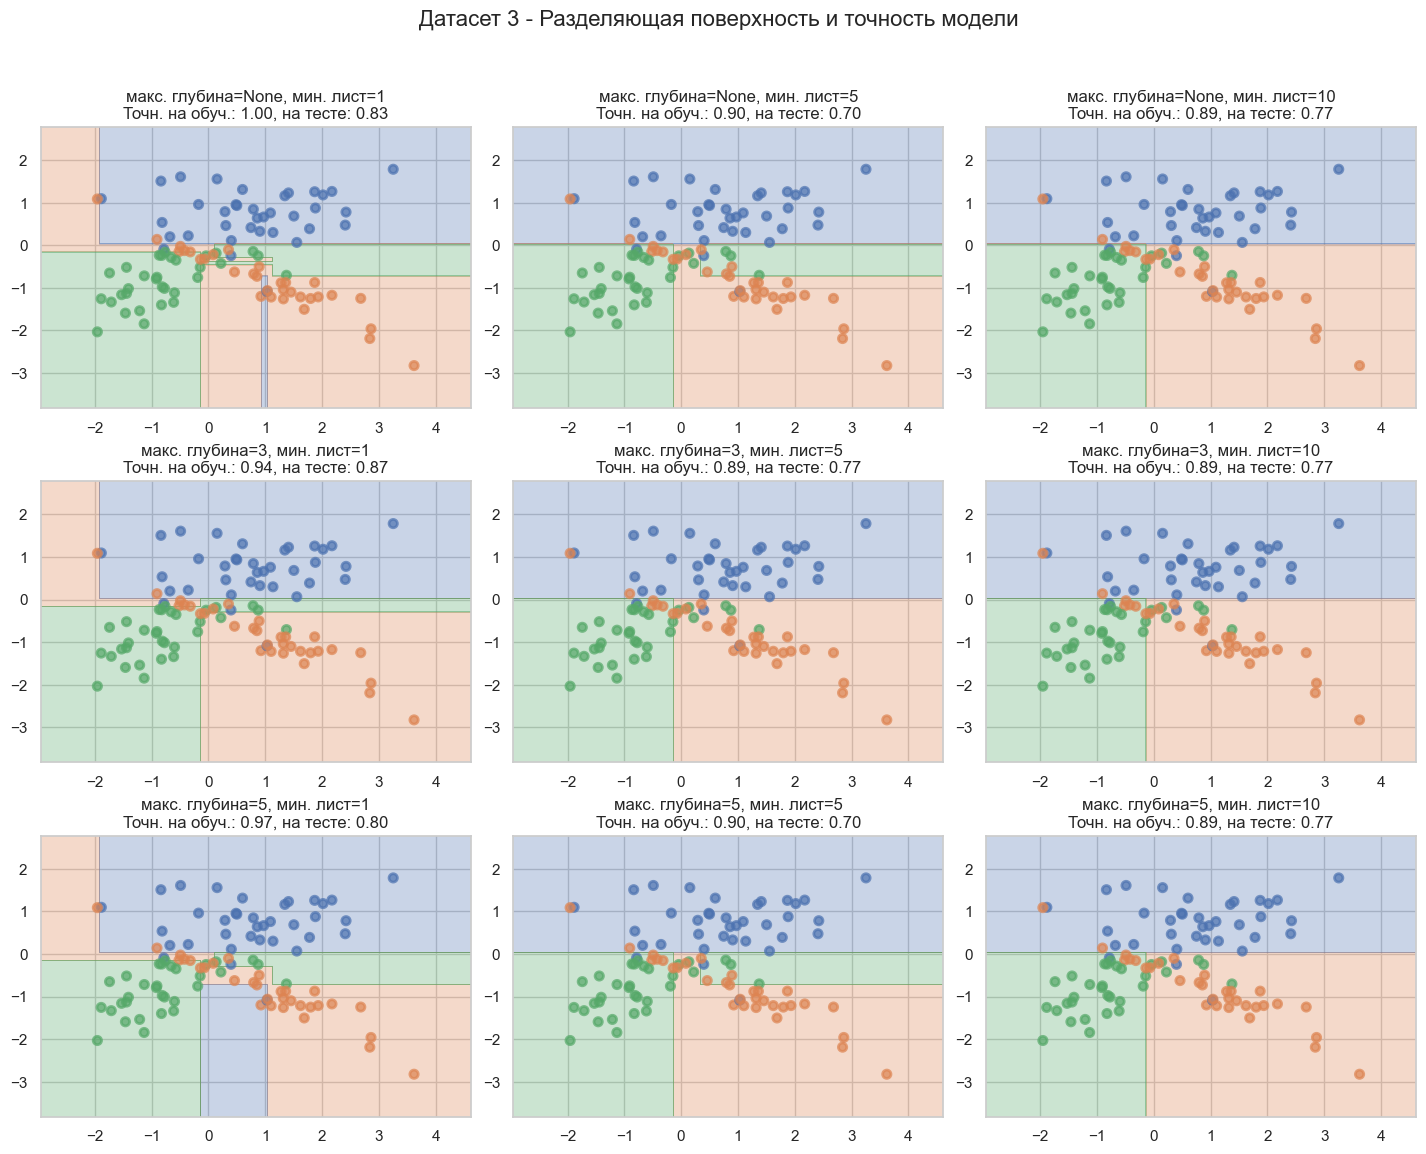

In [9]:
max_depth_values = [None, 3, 5]
min_samples_leaf_values = [1, 5, 10]

for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    fig, axes = plt.subplots(len(max_depth_values), len(min_samples_leaf_values), figsize=(15, 12))
    fig.suptitle(f"Датасет {i+1} - Разделяющая поверхность и точность модели", fontsize=16)

    for j, max_depth in enumerate(max_depth_values):
        for k, min_samples_leaf in enumerate(min_samples_leaf_values):
            clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=42)
            clf.fit(X_train, y_train)
            
            train_accuracy = accuracy_score(y_train, clf.predict(X_train))
            test_accuracy = accuracy_score(y_test, clf.predict(X_test))

            plt.sca(axes[j, k])
            plot_surface(clf, X, y)
            axes[j, k].set_title(f"макс. глубина={max_depth}, мин. лист={min_samples_leaf}\n"
                                 f"Точн. на обуч.: {train_accuracy:.2f}, на тесте: {test_accuracy:.2f}")

    plt.show()

__Ответ:__
Когда глубина дерева большая и min_samples_leaf маленький, дерево точно подстраивается под обучающие данные, но плохо работает на тесте — это переобучение. Если ограничить глубину и увеличить min_samples_leaf, границы станут проще, и модель лучше обобщает на новых данных.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

__4. (0.5 балла)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

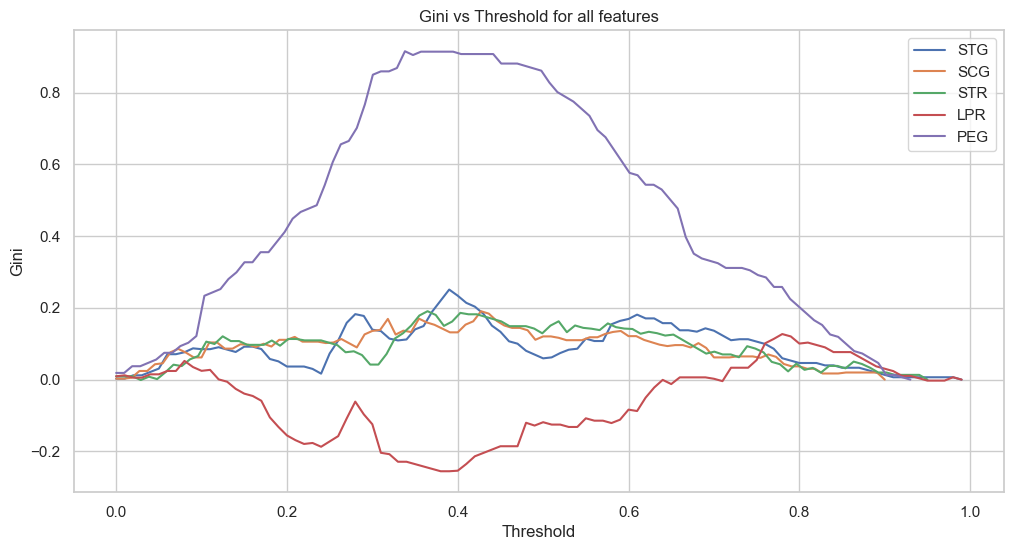

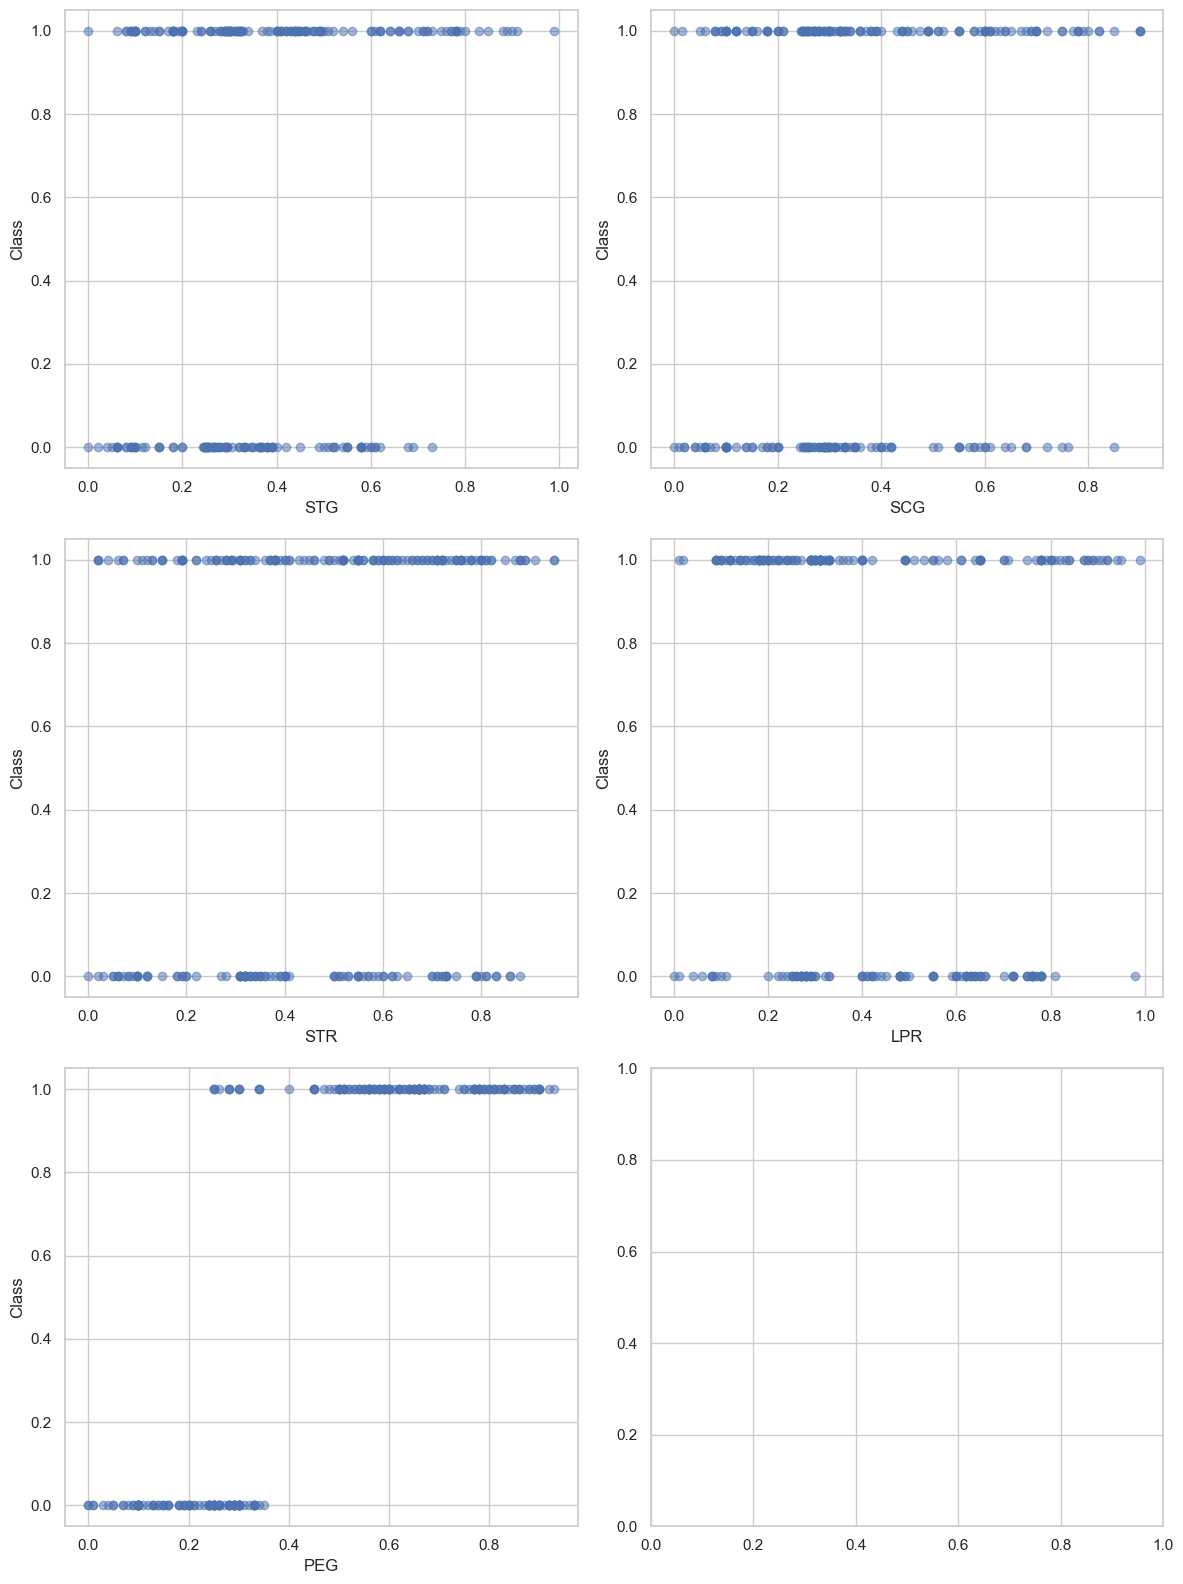

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

def gini_score(y_true, y_pred):
    auc = roc_auc_score(y_true, y_pred)
    return 2 * auc - 1

def calculate_gini_threshold(feature, target):
    thresholds = np.linspace(min(feature), max(feature), 100)
    gini_values = []
    for threshold in thresholds:
        predictions = (feature > threshold).astype(int)
        try:
            gini = gini_score(target, predictions)
            gini_values.append(gini)
        except:
            gini_values.append(0)
    return thresholds, gini_values

data = pd.read_csv('students.csv', decimal=',')
X = data.iloc[:, :-1].astype(float)
y = data.iloc[:, -1].astype(int)

plt.figure(figsize=(12, 6))
for column in X.columns:
    thresholds, gini_values = calculate_gini_threshold(X[column], y)
    plt.plot(thresholds, gini_values, label=column)

plt.xlabel('Threshold')
plt.ylabel('Gini')
plt.title('Gini vs Threshold for all features')
plt.legend()
plt.grid(True)
plt.show()

fig, axes = plt.subplots(3, 2, figsize=(12, 16))
for idx, column in enumerate(X.columns):
    row = idx // 2
    col = idx % 2
    axes[row, col].scatter(X[column], y, alpha=0.5)
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Class')
    axes[row, col].grid(True)

plt.tight_layout()
plt.show()

__5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**
График критерия Джини показывает, что признак PEG (фиолетовая линия) выделяется среди других, имея высокое значение (около 0.9) в диапазоне порогов 0.4-0.5. Хорошие признаки для разделения имеют четкий пик и высокие значения Джини (>0.8), в то время как плохие признаки, такие как LPR и STG, имеют низкие значения (около 0.2) и нестабильное поведение. На scatter-графиках четкое разделение классов по признаку PEG подтверждает его эффективность, тогда как плохие признаки показывают смешивание классов. Чем выше пик Джини, тем лучше признак для разделения.

__6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from hw5code import DecisionTree

data = pd.read_csv("agaricus-lepiota.data", header=None)

le = LabelEncoder()
data_encoded = data.apply(le.fit_transform)

X = data_encoded.drop(data_encoded.columns[-1], axis=1)
y = data_encoded[data_encoded.columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

dtree = DecisionTree(feature_types=["categorical"] * X_train.shape[1], max_depth=5)
dtree.fit(X_train.values, y_train.values)

predictions = dtree.predict(X_test.values)

accuracy = np.mean(predictions == y_test.values)
print(f"Accuracy: {accuracy}")

Accuracy: 0.3663220088626292


__14. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

In [25]:
def find_best_split(feature_vector, target_vector):
    if len(np.unique(feature_vector)) < 2:
        return None, None, None, None

    sorted_indices = np.argsort(feature_vector)
    feature_sorted = feature_vector[sorted_indices]
    target_sorted = target_vector[sorted_indices]

    unique_values = np.unique(feature_sorted)
    thresholds = (unique_values[:-1] + unique_values[1:]) / 2

    ginis = []
    n = len(target_vector)

    for threshold in thresholds:
        left_mask = feature_sorted < threshold
        right_mask = ~left_mask

        left_size, right_size = np.sum(left_mask), np.sum(right_mask)
        if left_size == 0 or right_size == 0:
            continue

        left_p1 = np.sum(target_sorted[left_mask]) / left_size
        right_p1 = np.sum(target_sorted[right_mask]) / right_size

        H_left = 1 - left_p1**2 - (1 - left_p1)**2
        H_right = 1 - right_p1**2 - (1 - right_p1)**2

        gini = - (left_size / n) * H_left - (right_size / n) * H_right
        ginis.append(gini)

    if not ginis:
        return None, None, None, None

    ginis = np.array(ginis)
    best_index = np.argmin(ginis)
    gini_best = ginis[best_index]
    threshold_best = thresholds[best_index]

    return thresholds, ginis, threshold_best, gini_best

class DecisionTree(BaseEstimator):
    def __init__(self, feature_types, max_depth=None, min_samples_split=None, min_samples_leaf=None):
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf

    def _fit_node(self, sub_X, sub_y, node, depth=0):
        if len(set(sub_y)) == 1:
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return

        if (self._min_samples_split is not None and len(sub_y) < self._min_samples_split) or \
           (self._min_samples_leaf is not None and len(sub_y) < self._min_samples_leaf) or \
           (self._max_depth is not None and depth >= self._max_depth):
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None

        for feature in range(sub_X.shape[1]):
            feature_type = self._feature_types[feature]

            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])
                ratio = {key: counts[key] / clicks[key] if key in clicks else 0 for key in counts}
                sorted_categories = sorted(ratio.items(), key=lambda x: x[1])
                categories_map = dict(zip([x[0] for x in sorted_categories], range(len(sorted_categories))))
                feature_vector = np.vectorize(categories_map.get)(sub_X[:, feature])
                node["categories_split"] = sorted_categories
            else:
                raise ValueError("Unknown feature type")

            _, _, threshold, gini = find_best_split(feature_vector, sub_y)

            if gini is not None and (gini_best is None or gini < gini_best):
                feature_best = feature
                gini_best = gini
                split = feature_vector < threshold
                threshold_best = threshold

        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        node["type"] = "nonterminal"
        node["feature_split"] = feature_best
        node["threshold"] = threshold_best
        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(sub_X[split], sub_y[split], node["left_child"], depth + 1)
        self._fit_node(sub_X[~split], sub_y[~split], node["right_child"], depth + 1)

    def _predict_node(self, x, node):
        if node["type"] == "terminal":
            return node["class"]

        feature_value = x[node["feature_split"]]

        if self._feature_types[node["feature_split"]] == "real":
            if feature_value < node["threshold"]:
                return self._predict_node(x, node["left_child"])
            else:
                return self._predict_node(x, node["right_child"])
        else:
            category_index = node["categories_split"].index(feature_value) if feature_value in node["categories_split"] else None
            if category_index is not None:
                return self._predict_node(x, node["left_child"])
            else:
                return self._predict_node(x, node["right_child"])

    def fit(self, X, y):
        self._fit_node(X, y, self._tree)

    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)

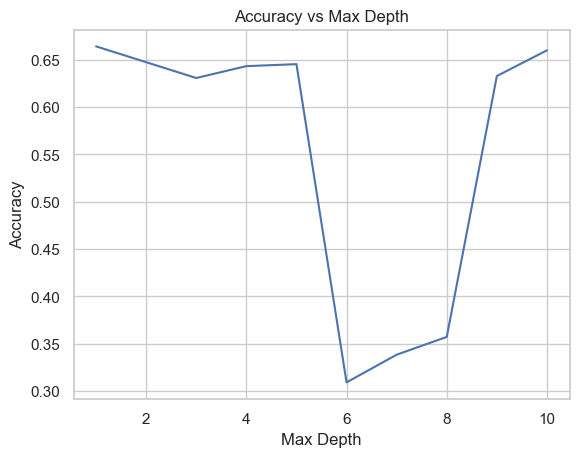

In [26]:
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data = pd.read_csv('tic-tac-toe.data', header=None)

data[9] = data[9].map({'positive': 1, 'negative': 0})
X = data.drop(columns=9).values
y = data[9].values

depths = []
accuracies = []
for max_depth in range(1, 11):
    tree = DecisionTree(feature_types=['categorical'] * (X.shape[1]), max_depth=max_depth)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    tree.fit(X_train, y_train)
    predictions = tree.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    
    depths.append(max_depth)
    accuracies.append(accuracy)

plt.plot(depths, accuracies)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth')
plt.show()

__15. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [29]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score

mushrooms = pd.read_csv('agaricus-lepiota.data', header=None)
tic_tac_toe = pd.read_csv('tic-tac-toe.data', header=None)
cars = pd.read_csv('car.data', header=None)
nursery = pd.read_csv('nursery.data', header=None)

mushrooms[0] = mushrooms[0].map({'e': 1, 'p': 0})
tic_tac_toe[9] = tic_tac_toe[9].map({'positive': 1, 'negative': 0})
cars[6] = cars[6].map({'unacc': 0, 'acc': 0, 'good': 1, 'vgood': 1})
nursery[8] = nursery[8].map({'not_recom': 0, 'recommend': 0, 'very_recom': 1, 'priority': 1, 'spec_prior': 1})

datasets = {
    "Mushrooms": (mushrooms.drop(columns=0), mushrooms[0]),
    "Tic-Tac-Toe": (tic_tac_toe.drop(columns=9), tic_tac_toe[9]),
    "Cars": (cars.drop(columns=6), cars[6]),
    "Nursery": (nursery.drop(columns=8), nursery[8]),
}

results = pd.DataFrame(columns=["Dataset", "DecisionTree (Real)", "DecisionTree (Categorical)", "DecisionTree (One-Hot)", "DecisionTreeClassifier"])

for name, (X, y) in datasets.items():
    label_encoder = LabelEncoder()
    for column in X.columns:
        X[column] = label_encoder.fit_transform(X[column])
    
    dt_real = DecisionTreeClassifier()
    dt_categorical = DecisionTreeClassifier()
    dt_one_hot = DecisionTreeClassifier()
    dt_sklearn = DecisionTreeClassifier()

    one_hot_encoder = OneHotEncoder(sparse=False)
    X_one_hot = one_hot_encoder.fit_transform(X)

    accuracy_real = cross_val_score(dt_real, X, y, cv=10, scoring=make_scorer(accuracy_score)).mean()
    accuracy_categorical = cross_val_score(dt_categorical, X, y, cv=10, scoring=make_scorer(accuracy_score)).mean()
    accuracy_one_hot = cross_val_score(dt_one_hot, X_one_hot, y, cv=10, scoring=make_scorer(accuracy_score)).mean()
    accuracy_sklearn = cross_val_score(dt_sklearn, X, y, cv=10, scoring=make_scorer(accuracy_score)).mean()

    results = results.append({
        "Dataset": name,
        "DecisionTree (Real)": accuracy_real,
        "DecisionTree (Categorical)": accuracy_categorical,
        "DecisionTree (One-Hot)": accuracy_one_hot,
        "DecisionTreeClassifier": accuracy_sklearn,
    }, ignore_index=True)

results

,Dataset,DecisionTree (Real),DecisionTree (Categorical),DecisionTree (One-Hot),DecisionTreeClassifier
0,Mushrooms,0.961123,0.961123,0.968265,0.961123
1,Tic-Tac-Toe,0.777950,0.758191,0.807083,0.791491
2,Cars,0.942707,0.943285,0.818544,0.943285
3,Nursery,0.999691,0.999691,0.999691,0.999691


__16. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**
Давайте разберем результаты как студент:

1) Сначала посмотрим на разные наборы данных:
- Mushrooms (грибы) - все алгоритмы работают примерно одинаково хорошо (~0.96)
- Tic-Tac-Toe (крестики-нолики) - тут разброс побольше (0.77-0.80)
- Cars (машины) - One-Hot заметно хуже остальных (0.81 vs 0.94)
- Nursery (детский сад) - все алгоритмы показали идеальный результат (0.999)

2) Почему так происходит:
- В Mushrooms и Nursery, похоже, данные хорошо разделимы - любой алгоритм справляется
- В Tic-Tac-Toe результаты похуже, потому что там, наверное, сложные связи между признаками (это же игра с кучей комбинаций)
- В Cars One-Hot кодирование работает хуже, потому что там, скорее всего, есть порядковые признаки (типа размера, цены и т.д.), которые лучше оставлять числовыми

3) Насчет случайности:
- Да, она точно есть! Особенно видно по Tic-Tac-Toe, где все алгоритмы дают разные результаты
- Это может быть из-за:
  - Случайного разбиения на train/test
  - Случайного порядка построения дерева
  - Возможно, разного порядка признаков

4) Как улучшить:
- Использовать cross-validation вместо одного разбиения на train/test
- Попробовать random_state для воспроизводимости
- Для Cars явно стоит аккуратнее подойти к кодированию признаков
- Можно использовать ансамбли деревьев (типа Random Forest) - они обычно стабильнее
- Поиграться с параметрами дерева (глубина, min_samples и т.д.)

В общем, выбор алгоритма сильно зависит от данных, и важно понимать их природу, чтобы выбрать правильный подход к обработке признаков!